In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

In [ ]:
df_original = pd.read_csv("HW1_var_2.csv", sep=';')
df = df_original.copy()

#**Chapter 1**

In [ ]:
df.head()

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,2,1000002,2НДФЛ,Ремонт,0,0.45,мужской,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1000022,NaN,Ремонт,0,NaN,женский,0,0,Высшее/Второе высшее/Ученая степень,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1000042,2НДФЛ,Ремонт,1,0.16,мужской,0,0,Высшее/Второе высшее/Ученая степень,...,0.0,33.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1000062,Поступление зарплаты на счет,Покупка автомобиля,0,0.22,женский,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1000082,2НДФЛ,Покупка автомобиля,1,0.34,мужской,0,0,высшее,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10243 entries, 0 to 10242
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Номер варианта         10243 non-null  int64  
 1   ID                     10243 non-null  int64  
 2   INCOME_BASE_TYPE       10183 non-null  object 
 3   CREDIT_PURPOSE         10243 non-null  object 
 4   INSURANCE_FLAG         10243 non-null  int64  
 5   DTI                    10129 non-null  float64
 6   SEX                    10243 non-null  object 
 7   FULL_AGE_CHILD_NUMBER  10243 non-null  int64  
 8   DEPENDANT_NUMBER       10243 non-null  int64  
 9   EDUCATION              10243 non-null  object 
 10  EMPL_TYPE              10237 non-null  object 
 11  EMPL_SIZE              10130 non-null  object 
 12  BANKACCOUNT_FLAG       7905 non-null   float64
 13  Period_at_work         7904 non-null   float64
 14  age                    7905 non-null   float64
 15  EM

# Most of them are numeric type

Try to find mean, median, standard deviation, minimum, maximum, and data type for each indicator:

In [ ]:
mindgame = df.describe().T
mindgame['median'] = df.median(numeric_only=True)
mindgame.head(10)

,count,mean,std,min,25%,50%,75%,max,median
Номер варианта,10243.0,2.000000e+00,0.000000,2.0,2.00,2.00,2.00,2.00,2.00
ID,10243.0,1.102422e+06,59140.874754,1000002.0,1051212.00,1102422.00,1153632.00,1204842.00,1102422.00
INSURANCE_FLAG,10243.0,6.081226e-01,0.488193,0.0,0.00,1.00,1.00,1.00,1.00
DTI,10129.0,3.885428e-01,0.136821,0.0,0.28,0.41,0.49,0.59,0.41
FULL_AGE_CHILD_NUMBER,10243.0,5.571610e-01,0.778750,0.0,0.00,0.00,1.00,15.00,0.00
DEPENDANT_NUMBER,10243.0,4.881382e-03,0.083702,0.0,0.00,0.00,0.00,2.00,0.00
BANKACCOUNT_FLAG,7905.0,3.956989e-01,0.878518,0.0,0.00,0.00,0.00,4.00,0.00
Period_at_work,7904.0,6.560678e+01,66.589165,4.0,20.00,44.00,88.00,1204.00,44.00
age,7905.0,3.643099e+01,8.717338,23.0,29.00,35.00,43.00,63.00,35.00
max90days,3922.0,1.619582e+00,2.052388,0.0,0.00,1.00,2.00,50.00,1.00


Try to compute the count of unique values, zeros, and empty values. Then the proportion in % of the total.

In [ ]:
def column_quality_summary(df):
    rows = []
    total = len(df)

    for col in df.columns:
        s = df[col]

        # Basic info
        unique_vals = s.nunique(dropna=True)
        missing = s.isna().sum()
        pct_missing = round(100 * missing / total, 1) if total > 0 else 0

        # Count zeros only if it's a number column
        zeros = np.nan
        if pd.api.types.is_numeric_dtype(s):
            zeros = (s == 0).sum()

        rows.append([
            col,
            unique_vals,
            zeros,
            missing,
            pct_missing,
            s.dtype
        ])

    summary = pd.DataFrame(rows, columns=[
        'Column', 'Unique Values', 'Zeros', 'Missing', '% Missing', 'Type'
    ])
    return summary

summary = column_quality_summary(df)
print(tabulate.tabulate(summary, headers='keys', tablefmt='orgtbl', showindex=False))

| Column                |   Unique Values |   Zeros |   Missing |   % Missing | Type    |
|-----------------------+-----------------+---------+-----------+-------------+---------|
| Номер варианта        |               1 |       0 |         0 |         0   | int64   |
| ID                    |           10243 |       0 |         0 |         0   | int64   |
| INCOME_BASE_TYPE      |               4 |     nan |        60 |         0.6 | object  |
| CREDIT_PURPOSE        |              10 |     nan |         0 |         0   | object  |
| INSURANCE_FLAG        |               2 |    4014 |         0 |         0   | int64   |
| DTI                   |              60 |       1 |       114 |         1.1 | float64 |
| SEX                   |               2 |     nan |         0 |         0   | object  |
| FULL_AGE_CHILD_NUMBER |               7 |    6081 |         0 |         0   | int64   |
| DEPENDANT_NUMBER      |               3 |   10204 |         0 |         0   | int64   |
| EDUCATIO

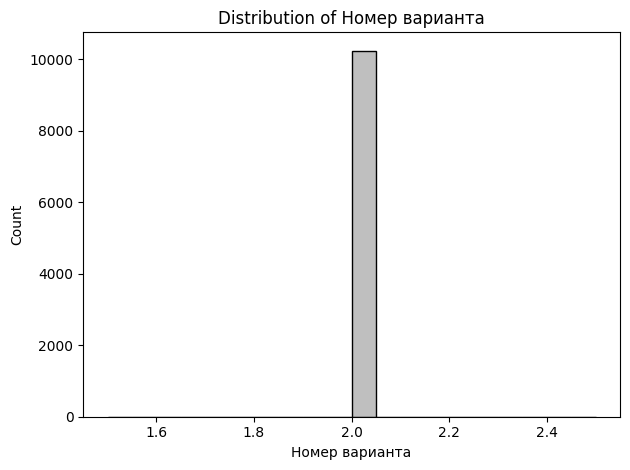

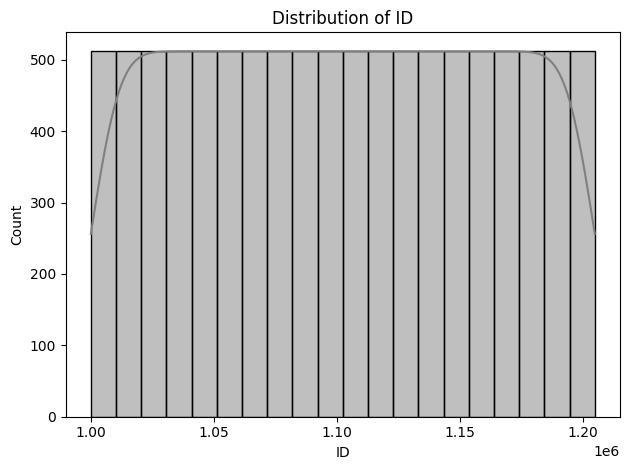

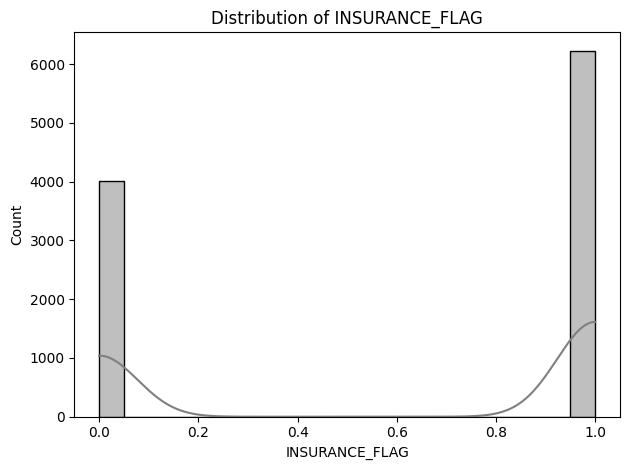

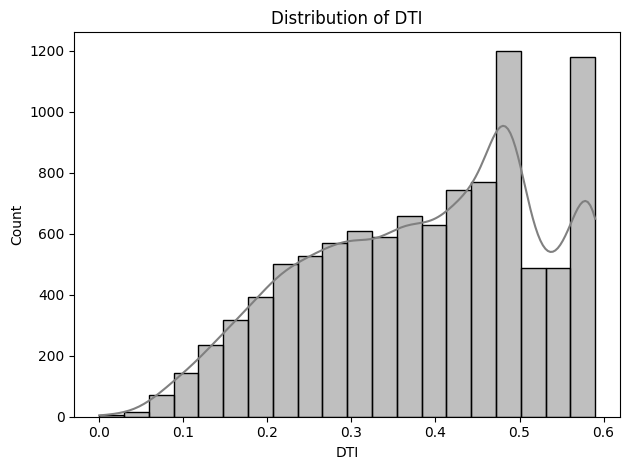

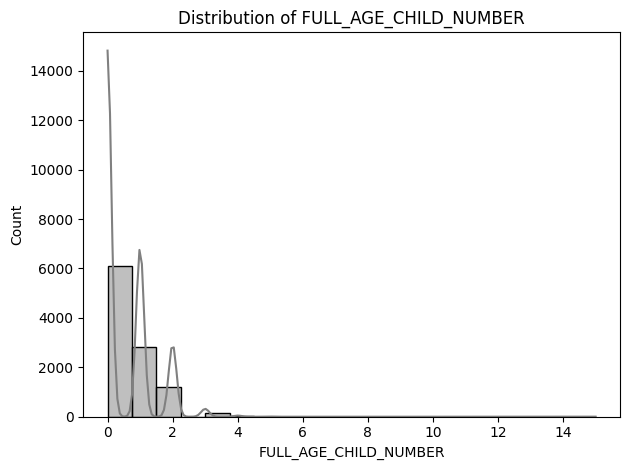

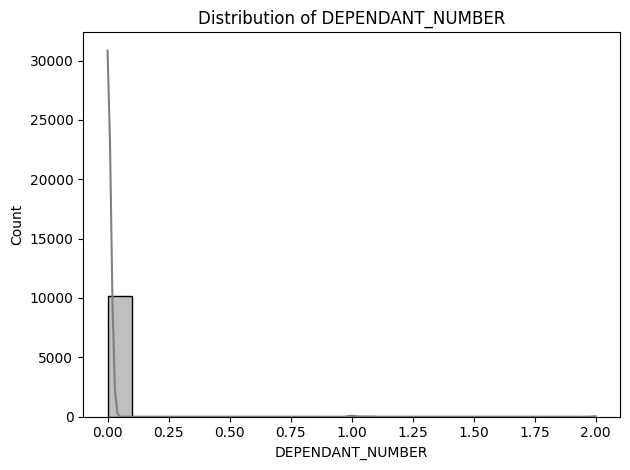

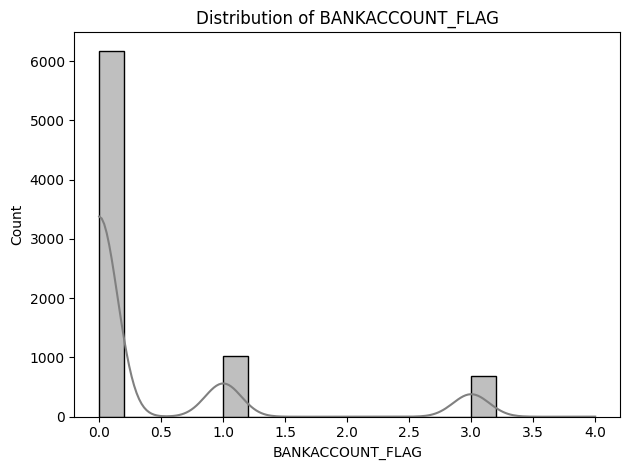

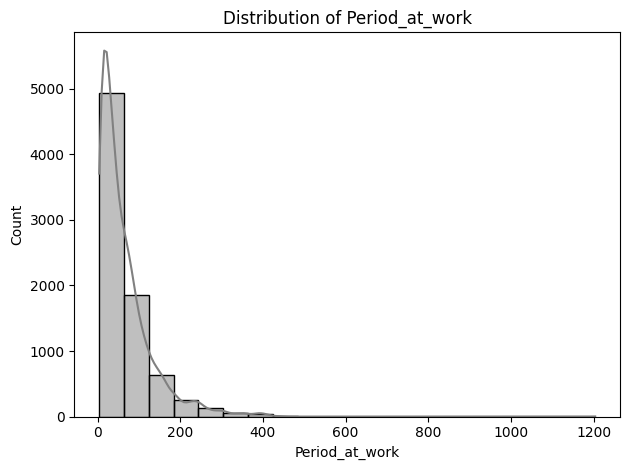

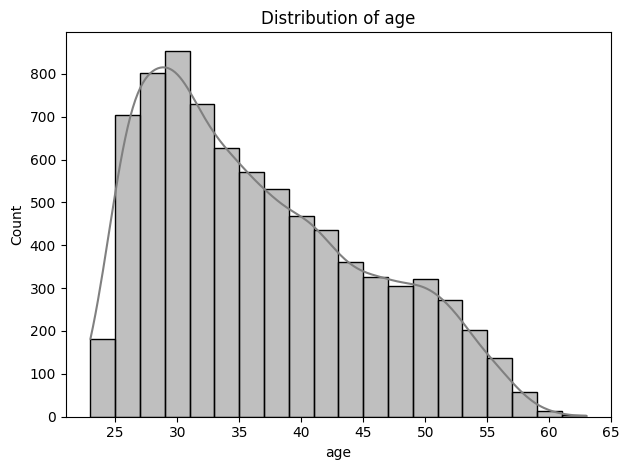

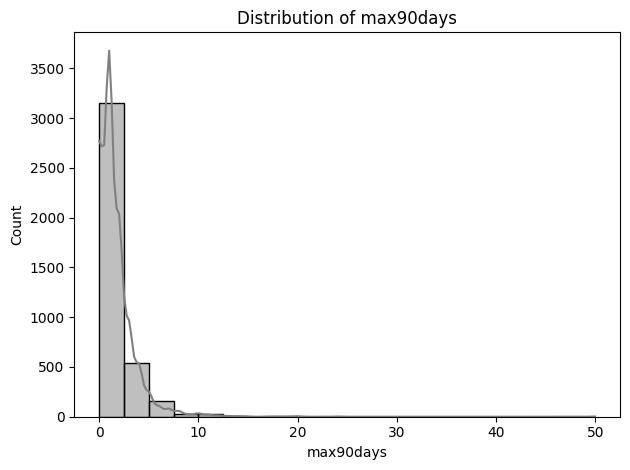

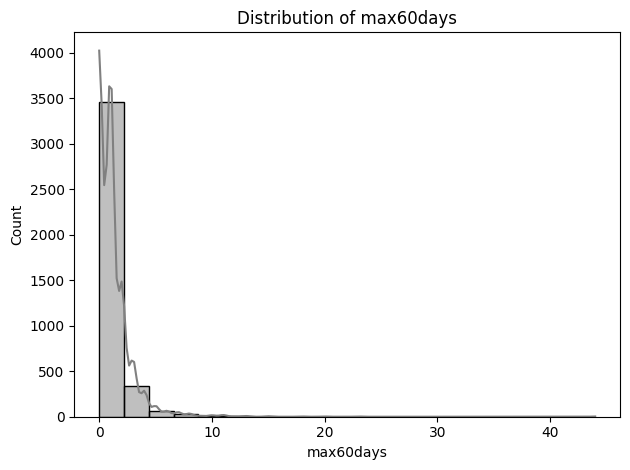

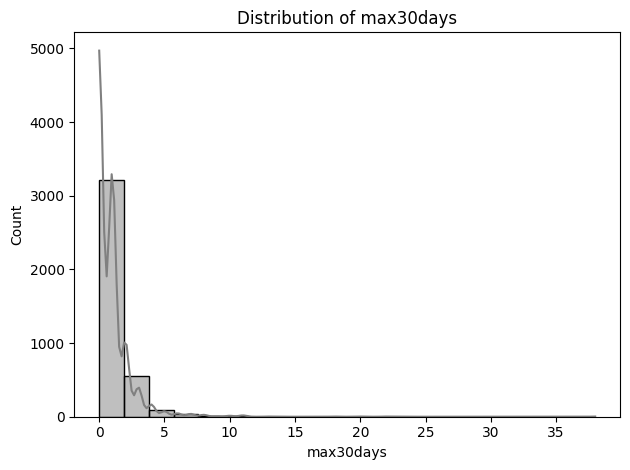

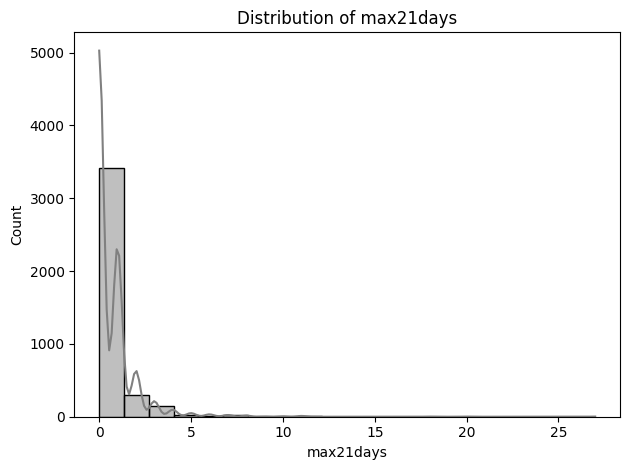

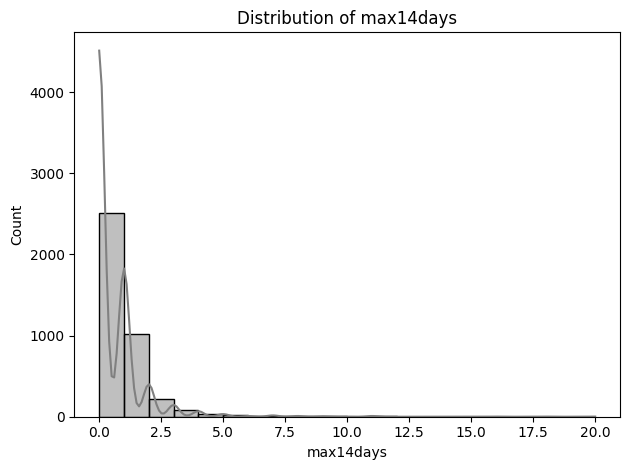

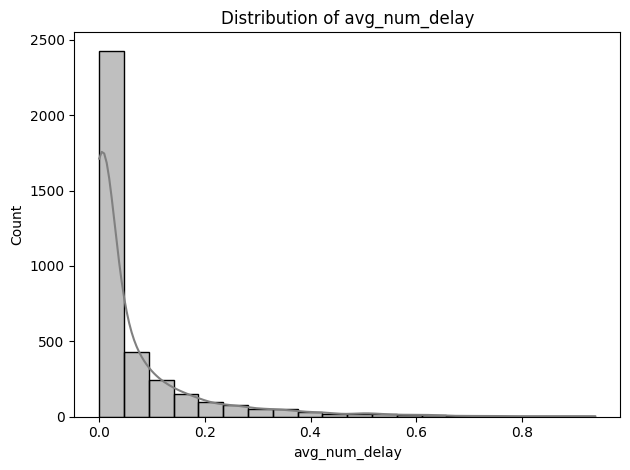

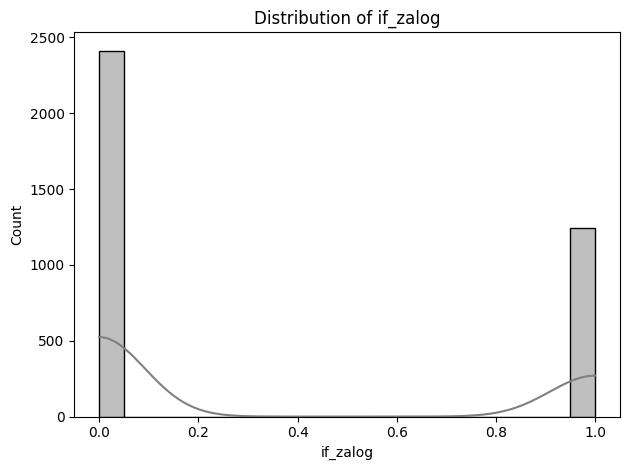

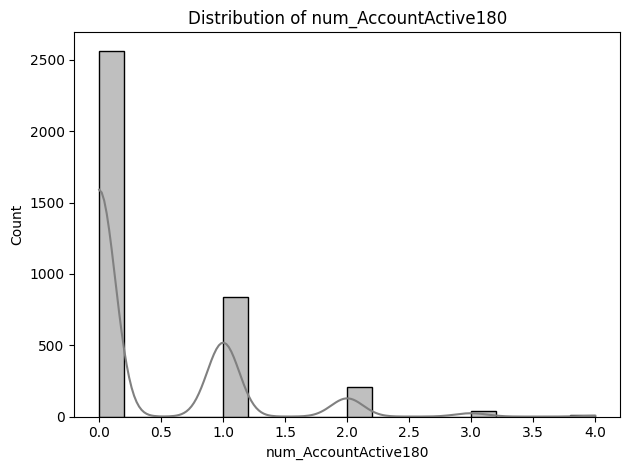

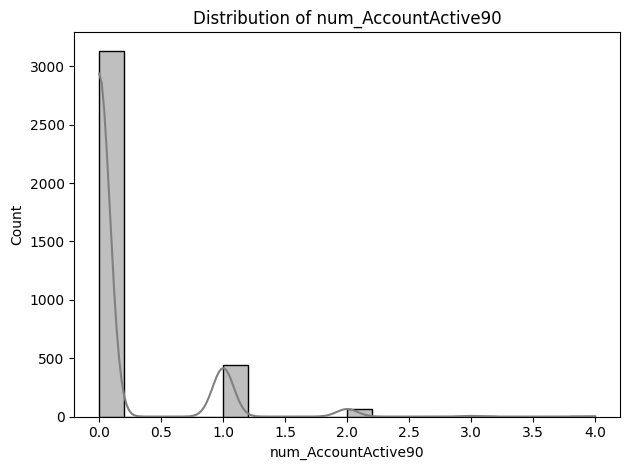

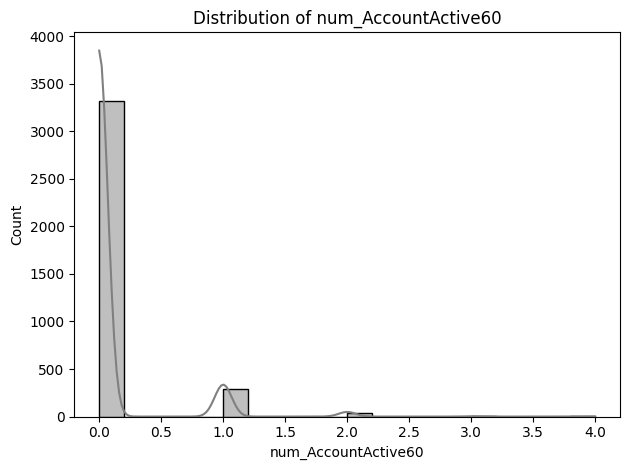

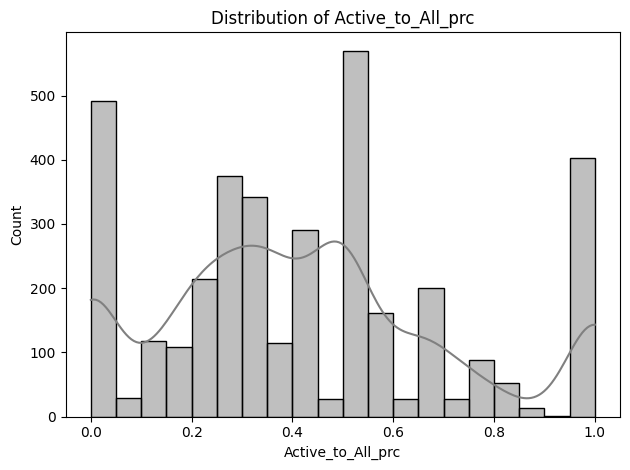

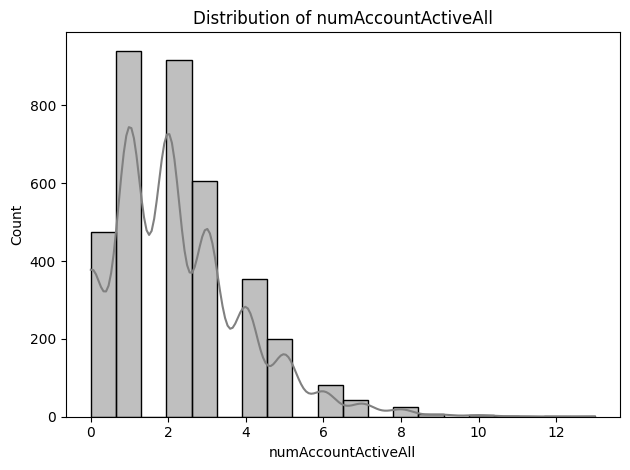

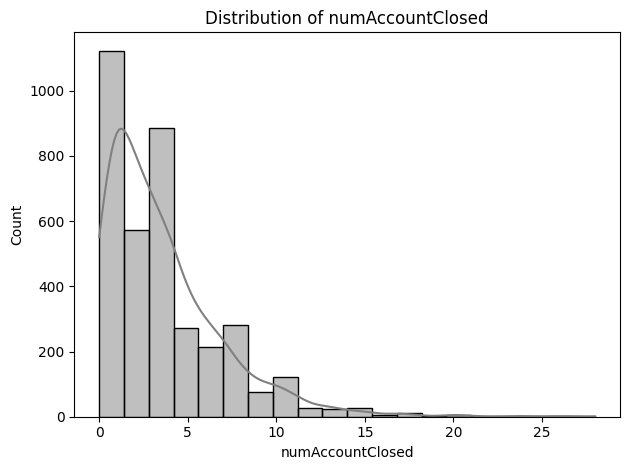

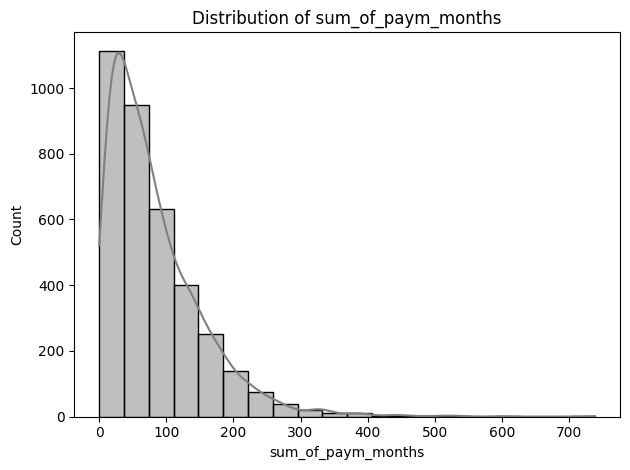

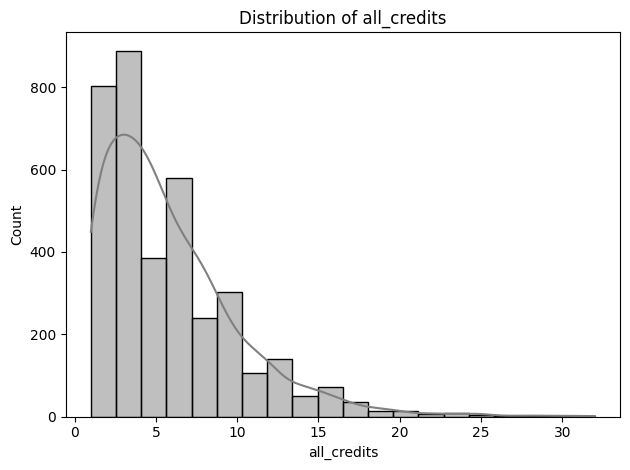

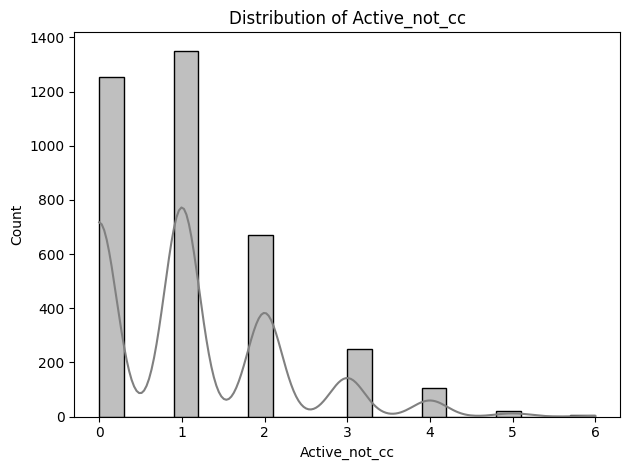

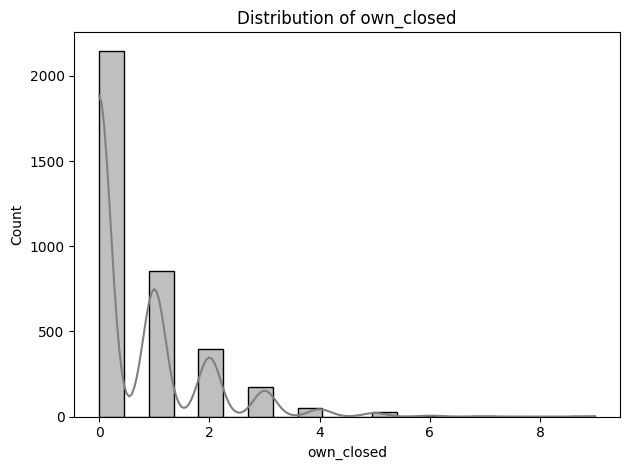

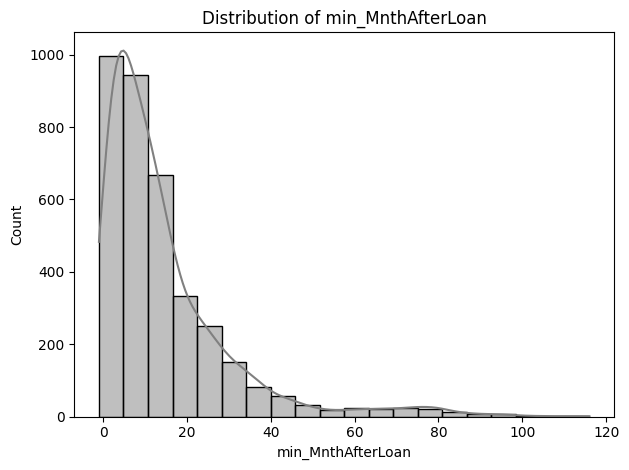

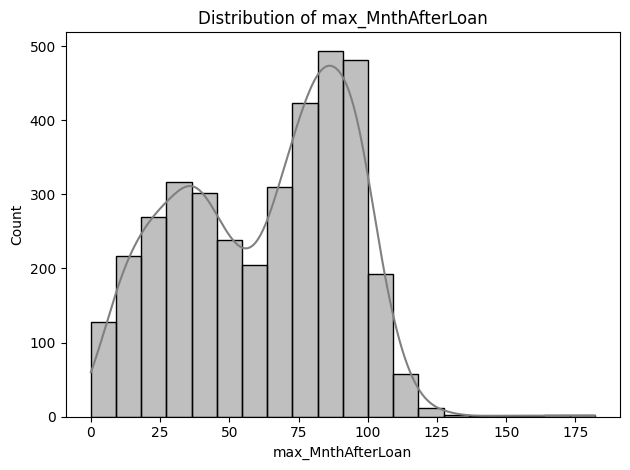

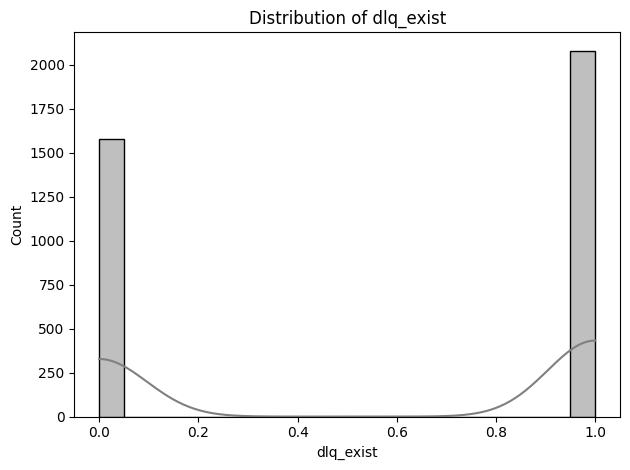

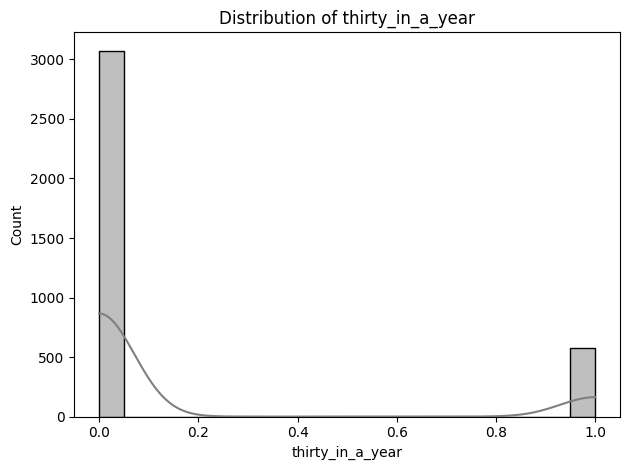

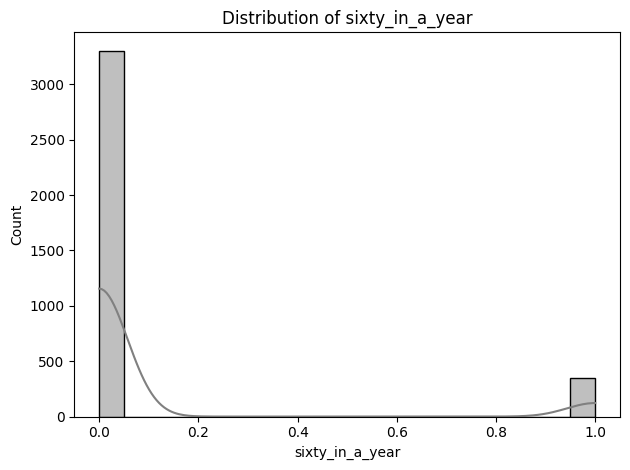

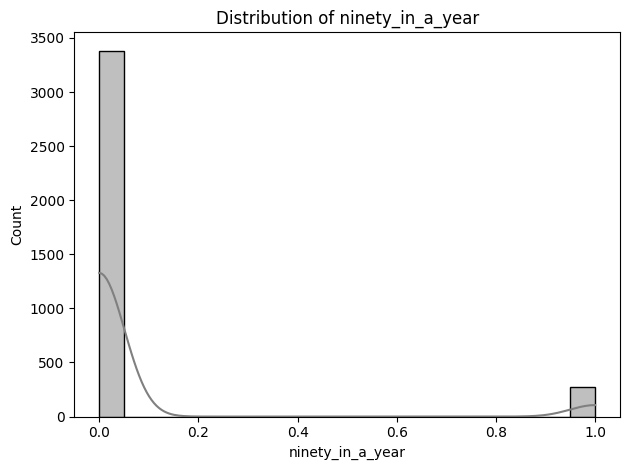

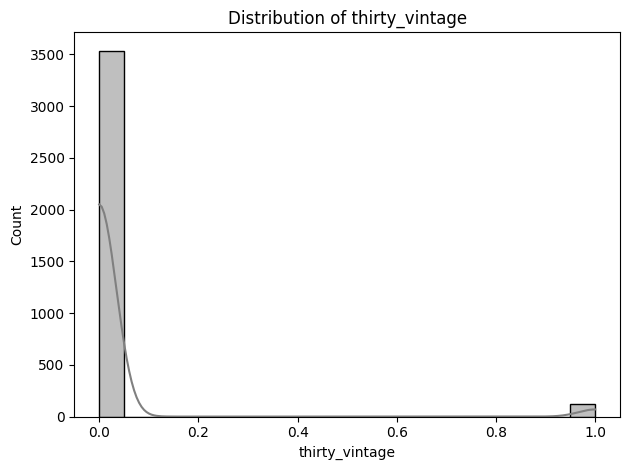

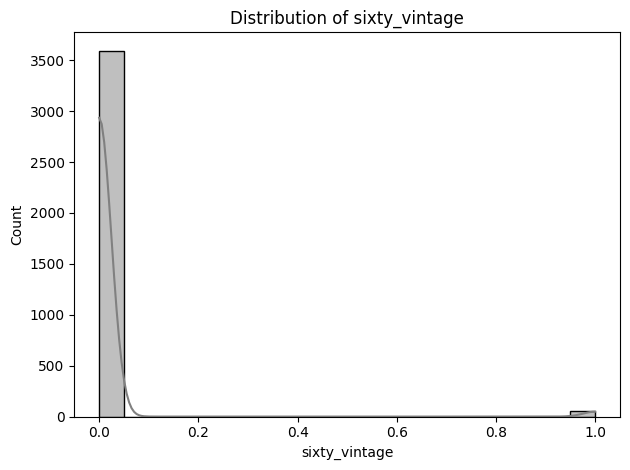

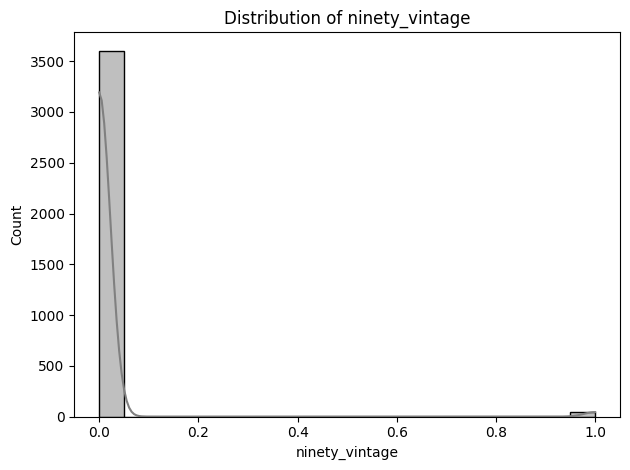

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    sns.histplot(df[col], kde=True, bins=20, color='gray')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

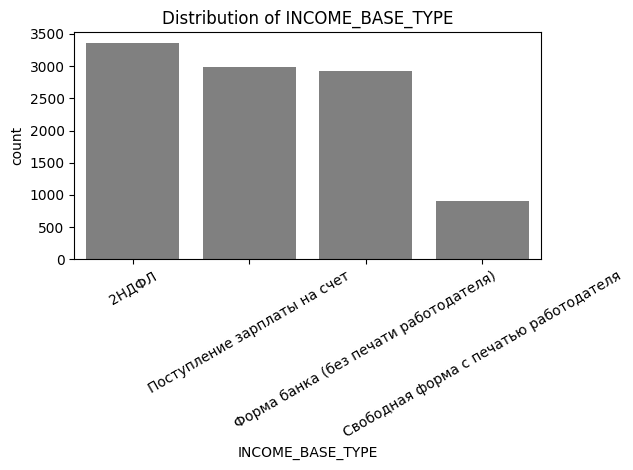

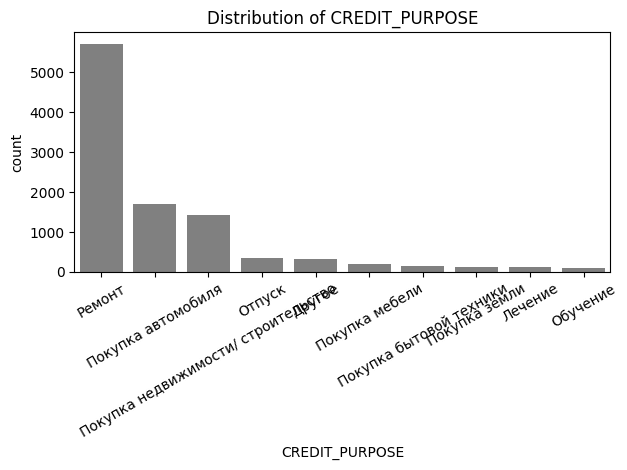

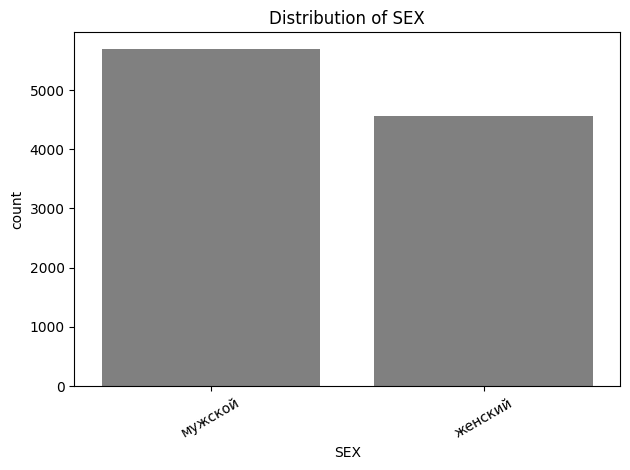

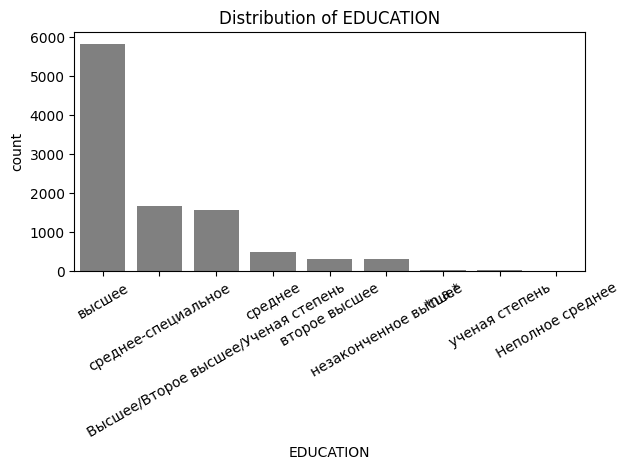

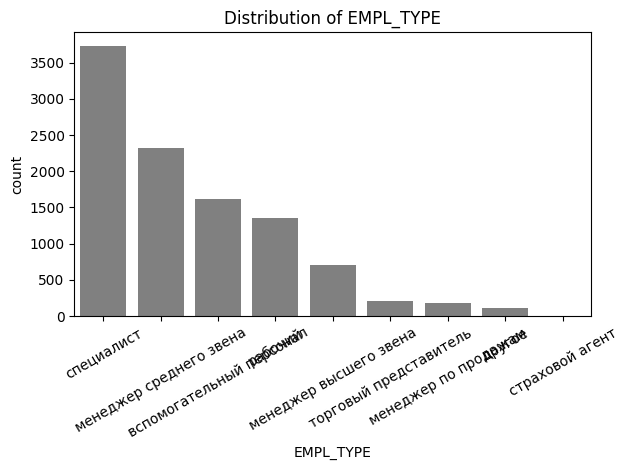

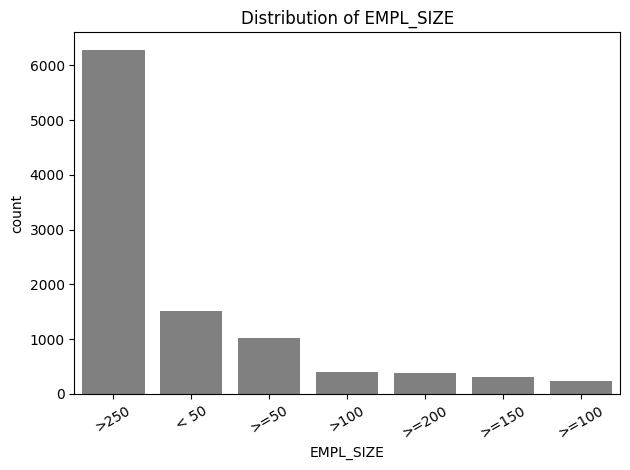

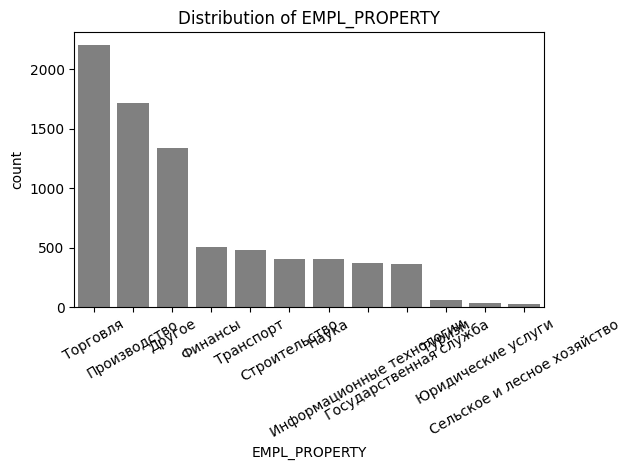

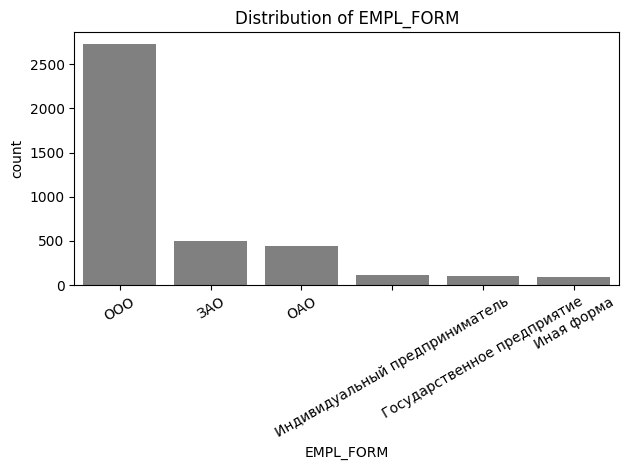

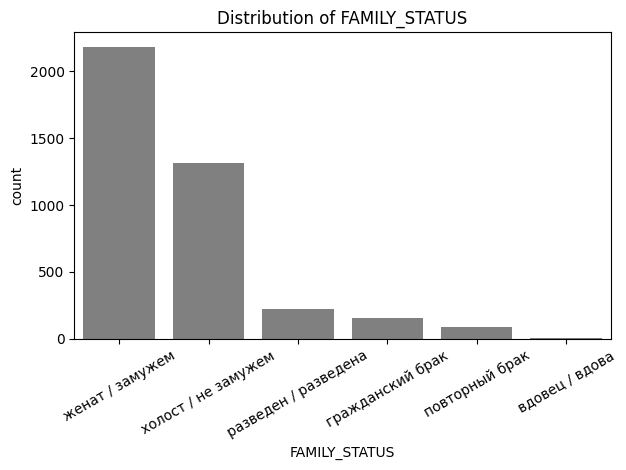

In [ ]:
 cat_cols = df.select_dtypes(exclude='number').columns

for col in cat_cols:
    sns.countplot(
        x=df[col],
        data=df,
        color='gray',
        order=df[col].value_counts().index
    )
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

What we can say about our data:

- **Income and Employment:** The most common income source is 2НДФЛ (personal income tax). Most clients are employed by "ООО" and work for organizations with more than 250 employees.
- **Credit Purpose:** The primary reason for taking out a loan is home repairs (Ремонт).
- **Demographics:** The client base is relatively balanced between men and women(but men are bit more). The majority of clients are married (женат/замужем).
- **Education:** A significant portion of clients have a university degree.
- **Credit History and Behavior:** Our graphs show that most people are taking out a loan for the first time. But there are also a huge number of people using loans of 70-100 month.



# Clear our data

In [ ]:

# Dropping columns with >50% of NANs
cols_to_drop = [col for col in df.columns if df[col].isna().mean() > 0.5]
print("Dropping columns:", cols_to_drop)
df = df.drop(columns=cols_to_drop)

Dropping columns: ['EMPL_FORM', 'FAMILY_STATUS', 'max90days', 'max60days', 'max30days', 'max21days', 'max14days', 'avg_num_delay', 'if_zalog', 'num_AccountActive180', 'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months', 'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']


In [ ]:
# Filling numeric NaNs with median
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [ ]:
# Feeling categorical NANs with mode
cat_cols = df.select_dtypes(exclude='number').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Converting categorical indicators to numeric ones
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


INCOME_BASE_TYPE: {'2НДФЛ': np.int64(0), 'Поступление зарплаты на счет': np.int64(1), 'Свободная форма с печатью работодателя': np.int64(2), 'Форма банка (без печати работодателя)': np.int64(3)}
CREDIT_PURPOSE: {'Другое': np.int64(0), 'Лечение': np.int64(1), 'Обучение': np.int64(2), 'Отпуск': np.int64(3), 'Покупка автомобиля': np.int64(4), 'Покупка бытовой техники': np.int64(5), 'Покупка земли': np.int64(6), 'Покупка мебели': np.int64(7), 'Покупка недвижимости/ строительство': np.int64(8), 'Ремонт': np.int64(9)}
SEX: {'женский': np.int64(0), 'мужской': np.int64(1)}
EDUCATION: {'*n.a.*': np.int64(0), 'Высшее/Второе высшее/Ученая степень': np.int64(1), 'Неполное среднее': np.int64(2), 'второе высшее': np.int64(3), 'высшее': np.int64(4), 'незаконченное высшее': np.int64(5), 'среднее': np.int64(6), 'среднее-специальное': np.int64(7), 'ученая степень': np.int64(8)}
EMPL_TYPE: {'вспомогательный персонал': np.int64(0), 'другое': np.int64(1), 'менеджер высшего звена': np.int64(2), 'менеджер по

In [ ]:
# Checking result
sum = column_quality_summary(df)
print(tabulate.tabulate(sum, headers=sum.columns, tablefmt='orgtbl'))

|    | Column                |   Unique Values |   Zeros |   Missing |   % Missing | Type    |
|----+-----------------------+-----------------+---------+-----------+-------------+---------|
|  0 | Номер варианта        |               1 |       0 |         0 |           0 | int64   |
|  1 | ID                    |           10243 |       0 |         0 |           0 | int64   |
|  2 | INCOME_BASE_TYPE      |               4 |    3417 |         0 |           0 | int64   |
|  3 | CREDIT_PURPOSE        |              10 |     325 |         0 |           0 | int64   |
|  4 | INSURANCE_FLAG        |               2 |    4014 |         0 |           0 | int64   |
|  5 | DTI                   |              60 |       1 |         0 |           0 | float64 |
|  6 | SEX                   |               2 |    4553 |         0 |           0 | int64   |
|  7 | FULL_AGE_CHILD_NUMBER |               7 |    6081 |         0 |           0 | int64   |
|  8 | DEPENDANT_NUMBER      |               3 |  

# **Chapter 2**

For our rule-based customer segmentation, we used Age and DTI (debt-to-income ratio) because together they tell us about a client’s life stage (like how mature or established they are) and how much debt they’re carrying relative to their income (which shows their financial risk).

In [ ]:
# Create age groups based on life stage
df['segment_BR_age'] = pd.cut(
    df['age'],
    bins=[0, 25, 35, 50, 65, 100],
    labels=['Youth', 'Adult', 'Mid', 'Mature', 'Senior'],
    right=False  # includes the left edge (e.g., 25 goes into 'Adult', not 'Youth')
)

# Create DTI (debt-to-income) risk tiers
df['segment_BR_dti'] = pd.cut(
    df['DTI'],
    bins=[0, 0.2, 0.4, 0.6, 0.8, 10],  # 10 as upper bound to catch any outliers >1
    labels=['Low', 'Medium', 'High', 'Very High', 'Extra High'],
    right=False
)

# Combine both into a single business-rule segment
df['segment_BR'] = df['segment_BR_age'].astype(str) + '_' + df['segment_BR_dti'].astype(str)

# Take a quick look at the results
df[['age', 'DTI', 'segment_BR_age', 'segment_BR_dti', 'segment_BR']].head()

,age,DTI,segment_BR_age,segment_BR_dti,segment_BR
0,27.0,0.45,Adult,High,Adult_High
1,27.0,0.41,Adult,High,Adult_High
2,31.0,0.16,Adult,Low,Adult_Low
3,26.0,0.22,Adult,Medium,Adult_Medium
4,54.0,0.34,Mature,Medium,Mature_Medium


In [ ]:
segment_counts = df['segment_BR'].value_counts().reset_index()
segment_counts.columns = ['segment_BR', 'count']
segment_counts['%'] = round(100 * segment_counts['count'] / len(df), 2)
num_segments = segment_counts.shape[0]
print(f"Total number of segments (clusters): {num_segments}\n")
print(segment_counts)

Total number of segments (clusters): 12

       segment_BR  count      %
0        Mid_High   2923  28.54
1      Mid_Medium   2029  19.81
2      Adult_High   1916  18.71
3    Adult_Medium   1395  13.62
4         Mid_Low    547   5.34
5     Mature_High    493   4.81
6       Adult_Low    407   3.97
7   Mature_Medium    289   2.82
8    Youth_Medium     86   0.84
9      Youth_High     79   0.77
10     Mature_Low     63   0.62
11      Youth_Low     16   0.16


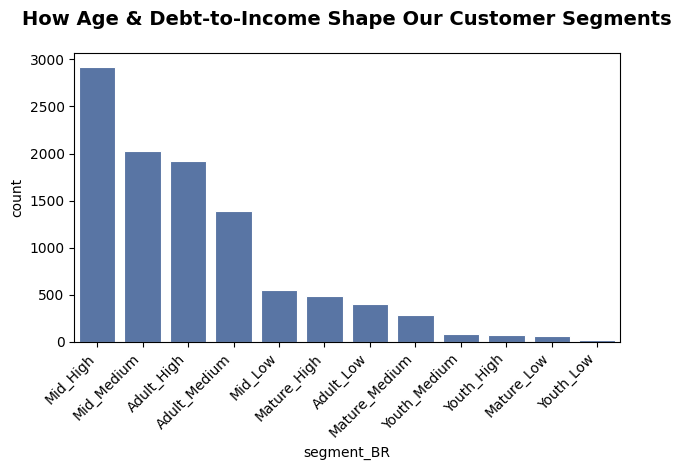

In [ ]:
sns.barplot(
    x='segment_BR',
    y='count',
    data=segment_counts,
    color='#4C72B0',
    edgecolor='white',
    linewidth=0.8
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('How Age & Debt-to-Income Shape Our Customer Segments', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



*   Most clients are in the Mid_High (28.5%) and Mid_Medium (19.8%) groups. So a huge chunk of our customers are middle-aged and carrying moderate to high debt relative to their income.
* Adult_High (18.7%) and Adult_Medium (13.6%) together make up about 32% of clients. This is showing that younger working adults are also well-represented, with a mix of debt levels.
* Very few clients fall into the low-DTI categories across all age groups (under 10% total). We can say that almost everyone in this dataset has taken on some amount of debt.
* Both young (Youth) and older (Mature) clients are a small minority—combined, they make up less than 10% of the base—so our current customer pool is mostly middle-aged or younger working adults.



For unsupervised segmentation – K-Means

In [ ]:
# Selecting the most essential
features = [
    'age',
    'DTI',
    'Period_at_work',
    'INSURANCE_FLAG',
    'BANKACCOUNT_FLAG',
    'FULL_AGE_CHILD_NUMBER',
    'SEX',
    'EDUCATION'
]

df_km = df[features].copy()

In [ ]:
# For all features be on similar scales, standartize them
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_km)

# **Chapter 3**

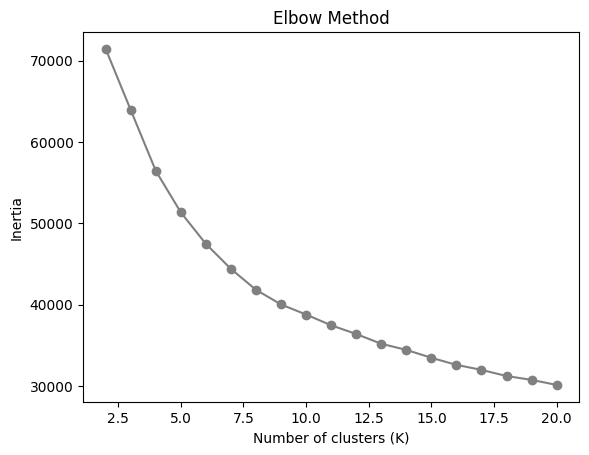

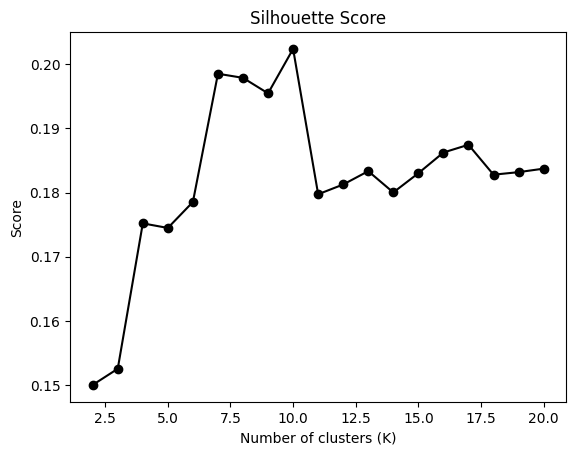

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia, silhouette = [], []
K_range = range(2, 21)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X_scaled, km.labels_))

# Plot elbow
plt.plot(K_range, inertia, '-o', color='gray')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette
plt.plot(K_range, silhouette, '-o', color='black')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Score')
plt.show()

* **Elbow Method**: The curve shows a noticeable "elbow" or point of inflection around K=6 to K=7, after which the decrease in inertia (within-cluster sum of squares) significantly slows down. This suggests that adding more clusters beyond this point does not substantially improve the clustering quality.

* **Silhouette Score**: The silhouette score peaks around K=7, indicating the best average separation between clusters at this number of clusters. While the absolute silhouette score is not very high (around 0.20), this can be expected with real-world datasets where clusters may overlap.

**K=7 appears to be a reasonable choice for the number of clusters in this dataset, as it represents a point where the decrease in inertia starts to level off and the silhouette score is maximized.**

In [ ]:
best_k = 7
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['segment_KM'] = kmeans.fit_predict(X_scaled)

In [ ]:
km_counts = df['segment_KM'].value_counts().reset_index()
km_counts.columns = ['cluster', 'count']
km_counts['%'] = round(100 * km_counts['count'] / len(df), 2)
km_counts

,cluster,count,%
0,0,2409,23.52
1,5,2064,20.15
2,2,1595,15.57
3,1,1443,14.09
4,3,1218,11.89
5,6,835,8.15
6,4,679,6.63


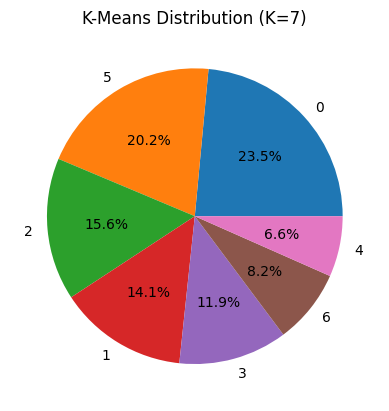

In [ ]:
plt.pie(km_counts['count'], labels=km_counts['cluster'], autopct='%1.1f%%')
plt.title('K-Means Distribution (K=7)')
plt.show()

# **Chapter 4**

**Business-Rule Segmentation Profiles**

In [46]:
# aggregate averages per segment
br_summary = df.groupby('segment_BR')[['age','DTI','Period_at_work','INSURANCE_FLAG','BANKACCOUNT_FLAG']].mean().reset_index()
br_summary


,segment_BR,age,DTI,Period_at_work,INSURANCE_FLAG,BANKACCOUNT_FLAG
0,Adult_High,29.341858,0.492458,46.008351,0.587161,0.518267
1,Adult_Low,29.702703,0.141916,48.508600,0.515971,0.277641
2,Adult_Medium,29.364158,0.302996,42.908244,0.561290,0.392832
3,Mature_High,52.837728,0.506653,113.835700,0.713996,0.361055
4,Mature_Low,52.333333,0.144921,108.428571,0.619048,0.190476
5,Mature_Medium,53.017301,0.307301,111.307958,0.615917,0.252595
6,Mid_High,38.648649,0.499778,64.602805,0.645912,0.240164
7,Mid_Low,38.488117,0.143638,66.394881,0.585009,0.138940
8,Mid_Medium,38.236077,0.298132,63.719566,0.598324,0.213406
9,Youth_High,23.620253,0.486076,25.949367,0.683544,0.000000



### Mature_High (~4.8%)
*   **Age:** ~53 years (average 52.8)
*   **DTI:** High (average 0.51)
*   **Work Experience:** ~9.5 years (average 114 months)
*   **Insurance Flag:** High level (around 71%)
*   **Bank Account Flag:** Below average (around 36%)
*   **Description:** Mature-aged clients with extensive work experience and high debt burden. They are most likely to take out insurance among all segments, but bank account ownership is below average.

### Mature_Medium (~2.8%)
*   **Age:** ~53 years (average 53.0)
*   **DTI:** Medium (average 0.31)
*   **Work Experience:** ~9.2 years (average 111 months)
*   **Insurance Flag:** Above average (around 62%)
*   **Bank Account Flag:** Below average (around 25%)
*   **Description:** Mature-aged clients with extensive work experience and moderate debt burden. The level of insurance usage is above average, and bank account ownership is below average.

### Mature_Low (~0.6%)
*   **Age:** ~52 years (average 52.3)
*   **DTI:** Low (average 0.14)
*   **Work Experience:** ~9 years (average 108 months)
*   **Insurance Flag:** Above average (around 62%)
*   **Bank Account Flag:** Very low (around 19%)
*   **Description:** Mature-aged clients with low debt burden and extensive work experience. The level of insurance usage is above average, and bank account ownership is very low.


### Mid_High (~28.5%)
*   **Age:** ~39 years (average 38.6)
*   **DTI:** High (average 0.50)
*   **Work Experience:** ~5.4 years (average 65 months)
*   **Insurance Flag:** Above average (around 65%)
*   **Bank Account Flag:** Below average (around 24%)
*   **Description:** The main segment. Middle-aged adults with significant work experience and high debt burden. They are more likely to take out insurance but less likely to have bank accounts compared to the Adult segments.

### Mid_Medium (~19.8%)
*   **Age:** ~38 years (average 38.2)
*   **DTI:** Medium (average 0.30)
*   **Work Experience:** ~5.3 years (average 64 months)
*   **Insurance Flag:** Average level (around 60%)
*   **Bank Account Flag:** Below average (around 21%)
*   **Description:** Middle-aged adults with average work experience and moderate debt burden. The level of insurance usage is average, and bank account ownership is below average.

### Mid_Low (~5.3%)
*   **Age:** ~38.5 years (average 38.5)
*   **DTI:** Low (average 0.14)
*   **Work Experience:** ~5.5 years (average 66.4 months)
*   **Insurance Flag:** Average level (around 58.5%)
*   **Bank Account Flag:** Very low (around 14%)
*   **Description:** Middle-aged adults with low debt burden and significant work experience. The level of insurance usage is average, and bank account ownership is very low.

### Adult_High (~18.7%)
*   **Age:** ~29 years (average 29.3)
*   **DTI:** High (average 0.49)
*   **Work Experience:** ~4 years (average 46 months)
*   **Insurance Flag:** Above average (around 59%)
*   **Bank Account Flag:** Above average (around 52%)
*   **Description:** Young working adults with relatively short work experience but high debt burden. They actively use insurance and have bank accounts.

### Adult_Medium (~13.6%)
*   **Age:** ~29 years (average 29.4)
*   **DTI:** Medium (average 0.30)
*   **Work Experience:** ~3.5 years (average 43 months)
*   **Insurance Flag:** Average level (around 56%)
*   **Bank Account Flag:** Average level (around 39%)
*   **Description:** Young working adults with moderate debt burden and average work experience. The level of insurance usage and bank account ownership is average.

### Adult_Low (~4.0%)
*   **Age:** ~29 years (average 29.7)
*   **DTI:** Low (average 0.14)
*   **Work Experience:** ~4 years (average 48.5 months)
*   **Insurance Flag:** Average level (around 52%)
*   **Bank Account Flag:** Below average (around 28%)
*   **Description:** Young working adults with low debt burden. Work experience and insurance usage are average, and bank account ownership is below average.

### Youth (~1.8% total)
*   **Age:** ~24 years (average 23.6)
*   **Work Experience:** Limited (~1.7-2 years, average 20-26 months)
*   **Insurance Flag:** Above average (around 62.5% - 68%)
*   **Bank Account Flag:** Very low (0%)
*   **Description:** The youngest segment with limited work experience. They are more likely to take out insurance but very rarely have bank accounts. This segment includes sub-groups with High, Medium, and Low DTI, but the overall characteristics are similar.

## **K-Means Segmentation Profiles (segment_KM)**

Based on the aggregated data in `km_profile`, the following cluster profiles can be identified:

In [47]:
km_profile = (df.groupby('segment_KM')[['age', 'DTI', 'Period_at_work','INSURANCE_FLAG', 'BANKACCOUNT_FLAG','FULL_AGE_CHILD_NUMBER']].mean().round(2).reset_index())
km_profile

,segment_KM,age,DTI,Period_at_work,INSURANCE_FLAG,BANKACCOUNT_FLAG,FULL_AGE_CHILD_NUMBER
0,0,34.60,0.38,43.07,1.00,0.09,0.31
1,1,34.73,0.38,47.79,0.00,0.13,0.30
2,2,34.16,0.36,47.09,0.00,0.12,0.34
3,3,35.99,0.37,59.27,0.60,0.11,2.15
4,4,35.55,0.40,61.93,0.66,3.00,0.62
5,5,35.65,0.41,45.12,1.00,0.10,0.32
6,6,48.24,0.42,199.13,0.69,0.20,0.33


### Cluster 0 (≈ 23.5%)
*   **Age:** ~35 years (average 34.60)
*   **DTI:** Moderate (average 0.38)
*   **Work Experience:** ~3.6 years (average 43.07 months)
*   **Insurance Flag:** Very high level (1.00, i.e., everyone has insurance)
*   **Bank Account Flag:** Very low level (average 0.09)
*   **Number of full-age children:** Low (average 0.31)
*   **Description:** Primarily young and middle-aged clients with moderate debt burden and average work experience. A distinctive feature is the very high level of insurance usage and very low level of bank account ownership.

### Cluster 1 (≈ 14.1%)
*   **Age:** ~35 years (average 34.73)
*   **DTI:** Moderate (average 0.38)
*   **Work Experience:** ~4 years (average 47.79 months)
*   **Insurance Flag:** Very low level (0.00, i.e., no one has insurance)
*   **Bank Account Flag:** Very low level (average 0.13)
*   **Number of full-age children:** Low (average 0.30)
*   **Description:** Clients similar to Cluster 0 in age, DTI, and work experience, but with extremely low insurance usage and low bank account ownership.

### Cluster 2 (≈ 15.6%)
*   **Age:** ~34 years (average 34.16)
*   **DTI:** Moderate (average 0.36)
*   **Work Experience:** ~3.9 years (average 47.09 months)
*   **Insurance Flag:** Very low level (0.00, i.e., no one has insurance)
*   **Bank Account Flag:** Very low level (average 0.12)
*   **Number of full-age children:** Low (average 0.34)
*   **Description:** Another segment with low insurance and bank account usage, similar to Clusters 1 and 0 in age, DTI, and work experience.

### Cluster 3 (≈ 11.9%)
*   **Age:** ~36 years (average 35.99)
*   **DTI:** Moderate (average 0.37)
*   **Work Experience:** ~4.9 years (average 59.27 months)
*   **Insurance Flag:** Average level (average 0.60)
*   **Bank Account Flag:** Very low level (average 0.11)
*   **Number of full-age children:** High (average 2.15)
*   **Description:** This cluster stands out with a high average number of full-age children, along with moderate DTI, average work experience, and average insurance level. Bank account ownership is very low.

### Cluster 4 (≈ 6.6%)
*   **Age:** ~35.5 years (average 35.55)
*   **DTI:** Moderate (average 0.40)
*   **Work Experience:** ~5.2 years (average 61.93 months)
*   **Insurance Flag:** Above average (average 0.66)
*   **Bank Account Flag:** Very high level (average 3.00)
*   **Number of full-age children:** Average (average 0.62)
*   **Description:** Clients with moderate DTI, average work experience, and above-average insurance usage. The main characteristic is the very high average indicator of bank account ownership.

### Cluster 5 (≈ 20.1%)
*   **Age:** ~35.6 years (average 35.65)
*   **DTI:** Moderate (average 0.41)
*   **Work Experience:** ~3.8 years (average 45.12 months)
*   **Insurance Flag:** Very high level (1.00, i.e., everyone has insurance)
*   **Bank Account Flag:** Very low level (average 0.10)
*   **Number of full-age children:** Low (average 0.32)
*   **Description:** Clients similar to Cluster 0 in age, DTI, work experience, and very high insurance usage, but with a slightly higher average DTI. Bank account ownership is very low.

### Cluster 6 (≈ 8.1%)
*   **Age:** ~48 years (average 48.24)
*   **DTI:** Moderate (average 0.42)
*   **Work Experience:** ~16.6 years (average 199.13 months)
*   **Insurance Flag:** Above average (average 0.69)
*   **Bank Account Flag:** Low level (average 0.20)
*   **Number of full-age children:** Low (average 0.33)
*   **Description:** The oldest cluster with very extensive work experience and moderate DTI. Insurance usage is above average, and bank account ownership is low.

**Rule-based segmentation grouped clients by life stage and debt level, while K-Means clustering grouped them by behavior. Both methods show similar patterns: most customers are 30–45 years old with moderate debt-to-income ratios, while smaller groups include younger, higher-risk clients or older, more cautious ones. Using both approaches gives the bank clear, data-backed insights for better targeting and risk control.**